In [2]:
%pip install sympy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Juan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<h2>Importación</h2>

In [3]:
import numpy as np
import psutil
import math
from scipy.optimize import dual_annealing
import sympy
import subprocess
import glob
from queue import PriorityQueue
import re
import os 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

<h1>->Optimización de silueta NACA 2411 </h>

<h2>1. Ingreso de coordenadas [x,y] para extrados e intrados</h2>

Nota: Se elimino el valor de conexión entre extrados e intrados [0,0]

-> Extrados

In [4]:
xe=[1,0.93365,0.70475,0.44807,0.16175,0.0217]
ye=[0,0.0138,0.05158,0.07606,0.06659,0.02654]
print(" xe","\t"," ye")
matrix_length = len(xe)
for i in range(matrix_length):
    print(f"{xe[i]:.3f}","\t",f"{ye[i]:.3f}") 

 xe 	  ye
1.000 	 0.000
0.934 	 0.014
0.705 	 0.052
0.448 	 0.076
0.162 	 0.067
0.022 	 0.027


-> Intrados

In [36]:
xi=[0.02723,0.16912,0.4474,0.70198,0.93238,1]
yi=[-0.02061,-0.03379,-0.02637,-0.01436,-0.00326,0]
print(" xi","\t"," yi")
matrix_length = len(xi)
for i in range(matrix_length):
    print(f"{xi[i]:.3f}","\t",f"{yi[i]:.3f}") 

 xi 	  yi
0.027 	 -0.021
0.169 	 -0.034
0.447 	 -0.026
0.702 	 -0.014
0.932 	 -0.003
1.000 	 0.000


<h2>2. Sistema de ecuaciones para encontrar los coeficientes "a" del extrados e intrados</h2>

->Extrados

In [6]:
A = np.array([[pow(xe[j], i + 0.5) for i in range(0, 6)] for j in range(0, 6)])
b = np.array(ye)
sol_e = np.linalg.solve(A, b)
print(sol_e)


[ 0.18119909 -0.03827758 -0.44364229  0.56525658 -0.33368452  0.06914872]


-> Intrados

In [7]:
A = np.array([[pow(xi[j], i + 0.5) for i in range(0, 6)] for j in range(0, 6)])
b = np.array(yi)
sol_i = np.linalg.solve(A, b)
print(sol_i)

[-0.13611831  0.4344056  -0.85017457  1.121429   -0.79950799  0.22996628]


<h2>NOTA: aquí se verifican los resultados posteriores para y"emáx, y"imin, x_emax & x_imin

-> Calcular X_emax 


In [8]:
xee = sympy.symbols('xee')
fe = sum(sol_e[i]*xee**(i + 0.5) for i in range(0, 6))

dy = sympy.diff(fe, xee)

sol = sympy.solve(dy, xee)

def is_sol(xee):
    if sympy.im(xee) != 0:
        return False
    if xee < 0 or xee > 1:
        return False
    return True

x_eemax =float([xee for xee in sol if is_sol(xee)][0])
print("x_eemax=",x_eemax)
display(fe)

x_eemax= 0.34680341970639106


0.181199087377223*xee**0.5 - 0.0382775785098312*xee**1.5 - 0.443642286251962*xee**2.5 + 0.565256575196749*xee**3.5 - 0.333684515802732*xee**4.5 + 0.0691487179905537*xee**5.5

In [9]:
w = 0 
while w <= 0.1:
    ff = sum(sol_i[i]*w**(i + 0.5) for i in range(0, 6))
    print(f"{w:.5f}","\t",f"{ff:.5f}") 
    w += 0.002

while w <= 0.9:
    ff = sum(sol_i[i]*w**(i + 0.5) for i in range(0, 6))
    print(f"{w:.5f}","\t",f"{ff:.5f}") 
    w += 0.04
while w <= 1:
    ff = sum(sol_i[i]*w**(i + 0.5) for i in range(0, 6))
    print(f"{w:.5f}","\t",f"{ff:.5f}") 
    w += 0.002

0.00000 	 0.00000
0.00200 	 -0.00605
0.00400 	 -0.00850
0.00600 	 -0.01034
0.00800 	 -0.01187
0.01000 	 -0.01319
0.01200 	 -0.01435
0.01400 	 -0.01541
0.01600 	 -0.01637
0.01800 	 -0.01725
0.02000 	 -0.01807
0.02200 	 -0.01883
0.02400 	 -0.01955
0.02600 	 -0.02022
0.02800 	 -0.02085
0.03000 	 -0.02145
0.03200 	 -0.02201
0.03400 	 -0.02255
0.03600 	 -0.02306
0.03800 	 -0.02354
0.04000 	 -0.02401
0.04200 	 -0.02445
0.04400 	 -0.02487
0.04600 	 -0.02527
0.04800 	 -0.02566
0.05000 	 -0.02603
0.05200 	 -0.02638
0.05400 	 -0.02672
0.05600 	 -0.02704
0.05800 	 -0.02735
0.06000 	 -0.02765
0.06200 	 -0.02794
0.06400 	 -0.02821
0.06600 	 -0.02848
0.06800 	 -0.02873
0.07000 	 -0.02897
0.07200 	 -0.02921
0.07400 	 -0.02943
0.07600 	 -0.02965
0.07800 	 -0.02986
0.08000 	 -0.03006
0.08200 	 -0.03025
0.08400 	 -0.03043
0.08600 	 -0.03061
0.08800 	 -0.03078
0.09000 	 -0.03094
0.09200 	 -0.03110
0.09400 	 -0.03125
0.09600 	 -0.03139
0.09800 	 -0.03153
0.10000 	 -0.03167
0.14000 	 -0.03337
0.18000 	 -0.

In [10]:
w = 1
while w >= 0.9:
    ff = sum(sol_e[i]*w**(i + 0.5) for i in range(0, 6))
    print(f"{w:.5f}","\t",f"{ff:.5f}") 
    w -= 0.002

while w >= 0.1:
    ff = sum(sol_e[i]*w**(i + 0.5) for i in range(0, 6))
    print(f"{w:.5f}","\t",f"{ff:.5f}") 
    w -= 0.04
while w >= 0:
    ff = sum(sol_e[i]*w**(i + 0.5) for i in range(0, 6))
    print(f"{w:.5f}","\t",f"{ff:.5f}") 
    w -= 0.002


1.00000 	 0.00000
0.99800 	 0.00044
0.99600 	 0.00087
0.99400 	 0.00131
0.99200 	 0.00174
0.99000 	 0.00217
0.98800 	 0.00260
0.98600 	 0.00303
0.98400 	 0.00346
0.98200 	 0.00388
0.98000 	 0.00431
0.97800 	 0.00473
0.97600 	 0.00516
0.97400 	 0.00558
0.97200 	 0.00600
0.97000 	 0.00641
0.96800 	 0.00683
0.96600 	 0.00725
0.96400 	 0.00766
0.96200 	 0.00808
0.96000 	 0.00849
0.95800 	 0.00890
0.95600 	 0.00931
0.95400 	 0.00972
0.95200 	 0.01012
0.95000 	 0.01053
0.94800 	 0.01093
0.94600 	 0.01134
0.94400 	 0.01174
0.94200 	 0.01214
0.94000 	 0.01254
0.93800 	 0.01294
0.93600 	 0.01333
0.93400 	 0.01373
0.93200 	 0.01413
0.93000 	 0.01452
0.92800 	 0.01491
0.92600 	 0.01530
0.92400 	 0.01569
0.92200 	 0.01608
0.92000 	 0.01647
0.91800 	 0.01685
0.91600 	 0.01724
0.91400 	 0.01762
0.91200 	 0.01801
0.91000 	 0.01839
0.90800 	 0.01877
0.90600 	 0.01915
0.90400 	 0.01952
0.90200 	 0.01990
0.90000 	 0.02028
0.86000 	 0.02754
0.82000 	 0.03436
0.78000 	 0.04074
0.74000 	 0.04669
0.70000 	 

-> Calcular X_imax 

In [11]:
xii = sympy.symbols('xii')
fi = sum(sol_i[i]*xii**(i + 0.5) for i in range(0, 6))

dy = sympy.diff(fi, xii)

sol = sympy.solve(dy, xii)

def is_sol(xii):
    if sympy.im(xii) != 0:
        return False
    if xii < 0 or xii > 1:
        return False
    return True

x_imin = float([xii for xii in sol if is_sol(xii)][0])
print("x_imin=",x_imin)
display(fi)



x_imin= 0.18148093926360492


-0.136118311290176*xii**0.5 + 0.434405596661239*xii**1.5 - 0.850174573481454*xii**2.5 + 1.121429001834*xii**3.5 - 0.799507992115835*xii**4.5 + 0.229966278392231*xii**5.5

<h2>3. Calculo de los parametros del perfil original

-> Variables simbolicas, no son numeros. Se crean para desarrollar el sistema de ecuaciones

In [12]:
y_emax, y_imax, alpha, beta, y_bs, deltay_bs, x_emax, x_imax, dy_emax, dy_imax, r_ba=sympy.symbols("y_emax, y_imax, alpha, beta, y_bs, deltay_bs, x_emax,x_imax, dy_emax, dy_imax, r_ba")

->Los valores de ae & ai se vuelven simbolicos para emplearlo en el sistema (Iteradores)

In [13]:
ae=sympy.symbols("ae:6")
ai=sympy.symbols("ai:6")
k=sympy.symbols("k",integer=True)


-> Ecuaciones a resolver

In [59]:
eq1=sympy.sqrt(2*r_ba)-ae[0]
#extrados
eq2 =sum([ae[k-1]*pow(x_emax, k-0.5) for k in range(1, 7)])-y_emax
eq3=sum([(k-0.5)*ae[k-1]*pow(x_emax, k-1.5) for k in range(1, 7)])
eq4=sum([(k-1.5)*(k-0.5)*ae[k-1]*pow(x_emax, k-2.5) for k in range(1, 7)])-dy_emax
eq5=sum([ae[k-1] for k in range(1, 7)])-y_bs-0.5*deltay_bs    #ybs+deltaybs esto tiene que ser 0 porque se encuentra la punta cerrada y conectada en el eje x
eq6=sum([(k-0.5)*ae[k-1] for k in range(1, 7)])-sympy.tan((2*alpha-beta)/2)
#intrados 
eq7=sum([ai[k-1]*pow(x_imax, k-0.5) for k in range(1, 7)])-y_imax
eq8=sum([(k-0.5)*ai[k-1]*pow(x_imax, k-1.5) for k in range(1, 7)])
eq9=sum([(k-1.5)*(k-0.5)*ai[k-1]*pow(x_imax, k-2.5) for k in range(1, 7)])-dy_imax
eq10=sum([ai[k-1] for k in range(1, 7)])-y_bs-0.5*deltay_bs   #ybs+deltaybs esto tiene que ser 0 porque se encuentra la punta cerrada y conectada en el eje x
eq11=sum([(k-0.5)*ai[k-1] for k in range(1, 7)])-sympy.tan((2*alpha+beta)/2)
#Fueron igualadas a 0 para crear el sistema de solución con ayuda de sympy

-> Impresión y verificación 

In [60]:
display(eq1)
display(eq2)
display(eq3)
display(eq4)
display(eq5)
display(eq6)
display(eq7)
display(eq8)
display(eq9)
display(eq10)
display(eq11)

-ae0 + sqrt(2)*sqrt(r_ba)

ae0*x_emax**0.5 + ae1*x_emax**1.5 + ae2*x_emax**2.5 + ae3*x_emax**3.5 + ae4*x_emax**4.5 + ae5*x_emax**5.5 - y_emax

0.5*ae0/x_emax**0.5 + 1.5*ae1*x_emax**0.5 + 2.5*ae2*x_emax**1.5 + 3.5*ae3*x_emax**2.5 + 4.5*ae4*x_emax**3.5 + 5.5*ae5*x_emax**4.5

-0.25*ae0/x_emax**1.5 + 0.75*ae1/x_emax**0.5 + 3.75*ae2*x_emax**0.5 + 8.75*ae3*x_emax**1.5 + 15.75*ae4*x_emax**2.5 + 24.75*ae5*x_emax**3.5 - dy_emax

ae0 + ae1 + ae2 + ae3 + ae4 + ae5 - 0.5*deltay_bs - y_bs

0.5*ae0 + 1.5*ae1 + 2.5*ae2 + 3.5*ae3 + 4.5*ae4 + 5.5*ae5 - tan(alpha - beta/2)

ai0*x_imax**0.5 + ai1*x_imax**1.5 + ai2*x_imax**2.5 + ai3*x_imax**3.5 + ai4*x_imax**4.5 + ai5*x_imax**5.5 - y_imax

0.5*ai0/x_imax**0.5 + 1.5*ai1*x_imax**0.5 + 2.5*ai2*x_imax**1.5 + 3.5*ai3*x_imax**2.5 + 4.5*ai4*x_imax**3.5 + 5.5*ai5*x_imax**4.5

-0.25*ai0/x_imax**1.5 + 0.75*ai1/x_imax**0.5 + 3.75*ai2*x_imax**0.5 + 8.75*ai3*x_imax**1.5 + 15.75*ai4*x_imax**2.5 + 24.75*ai5*x_imax**3.5 - dy_imax

ai0 + ai1 + ai2 + ai3 + ai4 + ai5 - 0.5*deltay_bs - y_bs

0.5*ai0 + 1.5*ai1 + 2.5*ai2 + 3.5*ai3 + 4.5*ai4 + 5.5*ai5 - tan(alpha + beta/2)

<h2>->Simplificación con suposición

In [62]:
eq=[eq1, eq2,  eq4 , eq6, eq7, eq9, eq11] #Se crea un grupo para todas las ecuaciones, NOTA SE ELIMINA 3,5,8, 10 PORQUE VALEN 0!!!!
for i in range(len(eq)):
    for j in range(len(sol_e)):
        eq[i]=eq[i].subs(ae[j],sol_e[j])
    for j in range(len(sol_i)):
        eq[i]=eq[i].subs(ai[j],sol_i[j])
    eq[i]=eq[i].subs({ 'x_emax':x_eemax, 'x_imax':x_imin, 'deltay_bs':0, 'y_bs':0 }) #con derivadas se determina rapidamente estos valores para ayudar al solver

for e in eq:
    display(e) #todo esta igualado a cero

sqrt(2)*sqrt(r_ba) - 0.181199087377223

0.0787145471829201 - y_emax

-dy_emax - 0.570351882471961

-tan(alpha - beta/2) - 0.218786898681669

-y_imax - 0.0338256308100106

0.443214182932013 - dy_imax

0.0501428786981304 - tan(alpha + beta/2)

<h2>->Solver </h2>

In [63]:
def sistema_ecuaciones(x):
    eqv = list(map(lambda eq: float(eq.subs({  #programación funcional 
       'r_ba': x[0],
       'y_emax': x[1],
       'dy_emax': x[2],
       'alpha': x[3],
       'y_imax':x[4],
       'beta':x[5],
       'dy_imax': x[6]
       
    })),eq))

    return eqv


-> Se crean variables cero para permitir a Python resolver de forma lineal, con esto, se logra emplear el solver de "fsolve"

In [64]:
# Valores iniciales para las variables
x0 = np.zeros(len(eq))

# Resolver el sistema de ecuaciones
solucion = fsolve(sistema_ecuaciones, x0)

# Mostrar las soluciones aproximadas
print("Soluciones aproximadas:")
for i in solucion:
  print("%.6f" % i)


Soluciones aproximadas:
0.016417
0.078715
-0.570352
-0.082646
-0.033826
0.265494
0.443214


In [65]:
sol=np.array([*solucion]) #sprad operador de esparcir 


<h2>4. Calculo de los parametros de los perfiles variados 

In [20]:
def evalue_combi(i,j,k):
    i, j, k = i / 100, j/100, k/100
    sol[2]=solucion[2]*i
    sol[3]=solucion[3]*j
    sol[6]=solucion[6]*k
    eq1=[1.0,0,0,0,0,0]
    #extrados
    eq2 =[pow(x_eemax, k-0.5) for k in range(1, 7)]
    eq3=[(k-0.5)*pow(x_eemax, k-1.5) for k in range(1, 7)]
    eq4=[(k-1.5)*(k-0.5)*pow(x_eemax, k-2.5) for k in range(1, 7)]
    eq5=[1 for k in range(1, 7)]  #ybs+deltaybs esto tiene que ser 0 porque se encuentra la punta cerrada y conectada en el eje x
    eq6=[(k-0.5) for k in range(1, 7)]
    #intrados 
    eq7=[pow(x_imin, k-0.5) for k in range(1, 7)]
    eq8=[(k-0.5)*pow(x_imin, k-1.5) for k in range(1, 7)]
    eq9=[(k-1.5)*(k-0.5)*pow(x_imin, k-2.5) for k in range(1, 7)]
    eq10=[1 for k in range(1, 7)] #ybs+deltaybs esto tiene que ser 0 porque se encuentra la punta cerrada y conectada en el eje x
    eq11=[(k-0.5) for k in range(1, 7)]
    eq12=[-1.0,0,0,0,0,0]

    ve=[math.sqrt(2*sol[0]),sol[1],0,sol[2],0,math.tan((2*sol[3]-sol[5])/2)]
    vi=[sol[4],0,sol[6],0,math.tan((2*sol[3]+sol[5])/2),math.sqrt(2*sol[0])]     
    Ae=[eq1,eq2,eq3,eq4,eq5,eq6]
    Ai=[eq7,eq8,eq9,eq10,eq11,eq12]
    vi
    sole=np.linalg.solve(Ae,ve)

    soli=np.linalg.solve(Ai,vi)

    return(sole, soli)

<h3>-> Declaración de las funciones de los nuevos perfiles

In [21]:
def get_coord_combi(i,j,k):
    sole,soli=evalue_combi(i,j,k)
    xi = np.concatenate((
    np.arange(0, 0.1, 0.002),
    np.arange(0.1, 0.9, 0.04),
    np.arange(0.9, 1, 0.002)
))
    
    xe = np.concatenate((
    np.arange(1, 0.9, -0.002),
    np.arange(0.9, 0.1, -0.04),
    np.arange(0.1, 0, -0.002)
))
    fee = sum(sole[i]*xi**(i + 0.5) for i in range(0, 6))
    fii = sum(soli[i]*xi**(i + 0.5) for i in range(0, 6))
    xx=[*xi,*xi]
    yy=[*fee,*fii]
    return(xx,yy)



Creación de las impresiones de los nuevos perfiles

In [22]:
def plot_combi(i,j,k):
    xx,yy=get_coord_combi(i,j,k)
    plt.plot(xx,yy)


<h3>->Perfil base 2411

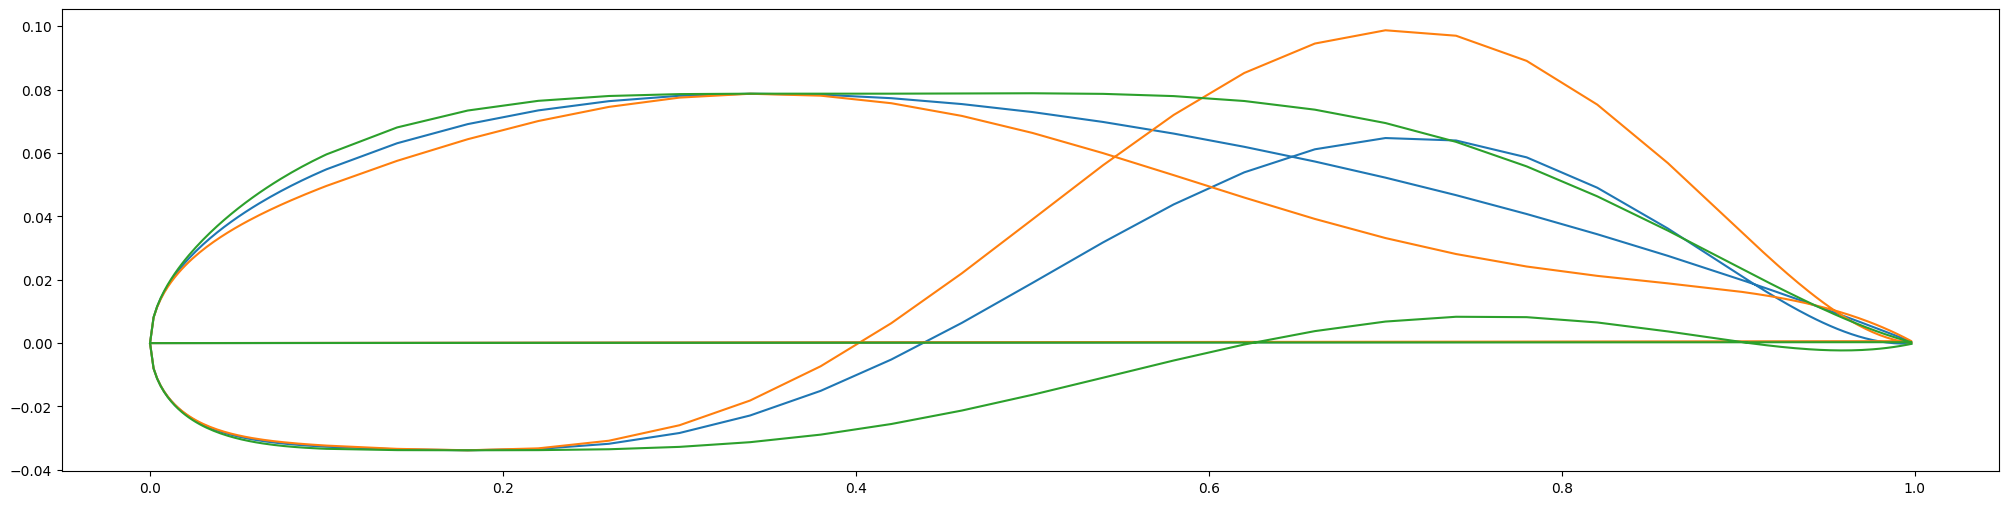

In [23]:
plt.figure(figsize=(25,6))
plot_combi(100,100,100)
plot_combi(200,200,150)
plot_combi(10,10,10)

<h3>->Impresión de varios perfiles

In [24]:
#plt.figure(figsize=(25,6))
#for i in range(10,200,5):
#    for j in range(10,200,5):
#        for k in range(10,140,5):
#            plot_combi(i,j,k)

<h2>5. Creación de documentos para la simulación en Xfoil

Geometría del perfil

In [25]:
def create_coord_file(xx,yy,fname):
    test_result=""
    for i in range(len(xx)):
        x=xx[i]
        y=yy[i]
        test_result += f"{x:.5f}" + (" "*(4 if y >= 0 else 3)) + f"{y:.5f}\n"
    test_result
    file=open(fname + ".dat","w")
    file.write(test_result)
    file.close()

Datos de simulación que ingresan a Xfoil y creación de archivo "resultados"

In [26]:
def run_simulation(i,j,k,fname=None):
    xx,yy=get_coord_combi(i,j,k)
    if fname is None:
        fname=f"barrido06/sim_{i}_{j}_{k}"
    create_coord_file(xx,yy,fname)
    strname = str(fname) + '.txt'
    airfoil_name = fname
    alpha_i = -17
    alpha_f = 20
    alpha_step = 0.25
    Re = 1000000
    n_iter = 100

    # %% XFOIL input file writer 

    if os.path.exists(strname):
        os.remove(strname)

    input_file = open(fname+".in", 'w')
    input_file.write("LOAD {0}.dat\n".format(airfoil_name))
    input_file.write(airfoil_name + '\n')
    input_file.write("PANE\n")
    input_file.write("OPER\n")
    input_file.write("Visc {0}\n".format(Re))
    input_file.write("PACC\n")
    input_file.write(strname+"\n\n ")
    input_file.write("ITER {0}\n".format(n_iter))
    input_file.write("ASeq {0} {1} {2}\n".format(alpha_i, alpha_f,
                                                alpha_step))
    input_file.write("\n\n")
    input_file.write("quit\n")
    input_file.close()

    process = subprocess.Popen("xfoil.exe < " + fname + ".in", shell=True)

    try:
        process.wait(timeout=60)
    except subprocess.TimeoutExpired:
        for child in psutil.Process(process.pid).children(recursive=True):
            child.kill()
        process.kill()

        print("killed " + fname + " after timeout")
    

Se indica a Xfoil que corra los datos anteriores

In [27]:
#for i in range(10,210,5):
#   for j in range(10,210,5):
#      for k in range(10,150,5):
#         run_simulation(i,j,k)
run_simulation(100,100,100)

<h2>6. Lectura de archivos para comparar el mejor


Lecutra de archivo

In [28]:
def get_params_from_fname(fname):
    params = re.search(r'sim_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)\.txt', fname)
    return [params.group(i) for i in range(1, 4)]

Ingreso al documento para separar las columnas de los archivos 

In [29]:
def filter_empty(values):
  return list(filter(lambda line: False if line == "" else True, values))

def get_values(line):
  values = re.split(r'\s+', line)
  values = filter_empty(values)
  return list(map(float, values))

def get_table(file):
  match_ = re.search(r'((?:-{2,} *)+)', file)
  match_.groups(1)
  
  table = file[match_.end(1): len(file)]
  lines = table.split("\n")
  lines = filter_empty(lines)

  values = list(map(get_values, lines))
  return values


Calculo de la eficiencia dentro de los archivos 

In [30]:
def get_value(table):
    cl_values=list(map(lambda line: line[1]/line[2], table))
    max=np.max(cl_values)  
    return max
    #return cl_values[6]

Por medio de "Queue" biblioteca de python se crea una lista de prioridad que permite ver el rango entre los parametros 

In [31]:
X=PriorityQueue()


In [32]:
for name in glob.glob('./barrido06/sim*.txt'):
    f = open(name, "r")
    content=f.read()
    params=get_params_from_fname(name)
    values = get_table(content)
    result=get_value(values)
    X.put((-result,params))#El orden da negativo pero no es el valor real, son positivos 
    f.close()

ValueError: zero-size array to reduction operation maximum which has no identity

<h1> 7. Lista ordenada de mejores eficiencias a peores

In [ ]:
n = 0
top=[]
while not X.empty():
    priority,params = X.get()
    priority*=-1
    top.append((priority,params))
    n += 1
display(top)

[(780.9090909090909, ['100', '100', '100'])]

<h2> Graficas que muestran el comportamiento de las diferentes combinaciones

Separación de formato 

In [ ]:
CL=[]
I=[]
J=[]
K=[]
for cl, (i, j, k) in top:
    CL.append(cl)
    I.append(float(i))
    J.append(float(j))
    K.append(float(k))


Impresión de grafico que muestra el comportamiento de los parametros combinados y la eficiencia de cada combinación


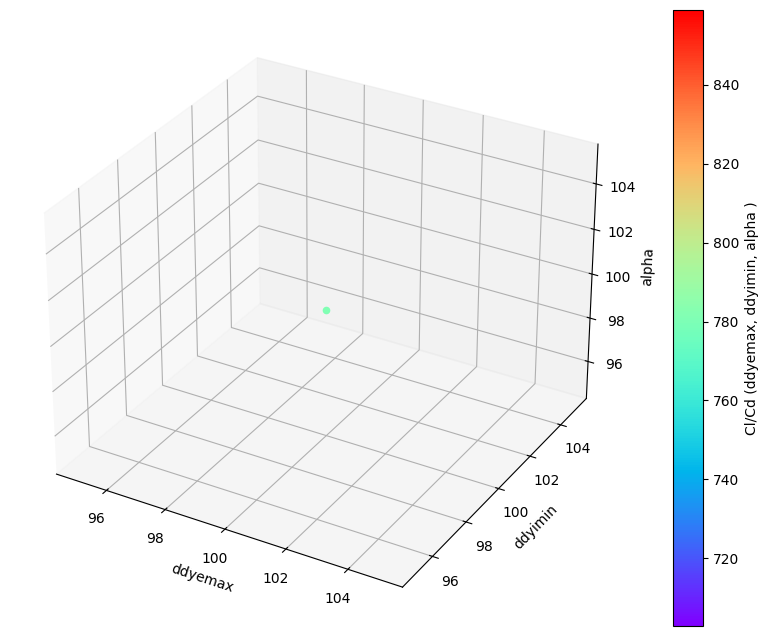

In [ ]:
# Create a colormap
cmap = plt.get_cmap('rainbow')  # You can change the colormap as needed

# Create a figure and 3D axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(I, J, K, c=CL, cmap=cmap, marker='o')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cl/Cd (ddyemax, ddyimin, alpha )')

# Set axis labels
ax.set_xlabel('ddyemax')
ax.set_ylabel('ddyimin')
ax.set_zlabel('alpha')

# Show the plot
plt.show()

In [ ]:
uid=int(0)
def evalue_sim(x):
    global uid
    i,j,k=x
    name=f"results_opt/_sim_{uid}"
    name2=name
    run_simulation(i,j,k,fname=name) #asignar a la fuerza un nombre 
    name+=".txt"
    f = open(name, "r")
    content=f.read()
    values = get_table(content)
    result=get_value(values)
    f.close()
    os.remove(name)
    os.remove(name2+".dat")
    try:
        os.remove(name2+".in")
    except PermissionError:
        print("PermissionError")
    uid+=1
    return result

In [ ]:
rangei=(10,210)
rangej=(10,210)
rangek=(10,150)
maxim = dual_annealing(lambda p:-evalue_sim(p), bounds=(rangei, rangej, rangek),maxiter=1000)
maxim

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
maxim.x

array([93.02032086, 94.83778533, 72.48077132])

In [ ]:
evalue_sim(maxim.x)

152.48496993987976

In [ ]:
run_simulation(93.02032086, 94.83778533, 72.48077132)
run_simulation(100,100,100)